# Proyek Analisis Data: [E-Commerce Public Dataset (Sumber) ]
- **Nama:** [Hanifah Al Humaira]
- **Email:** [hanifah200201@gmail.com]
- **ID Dicoding:** [Hanifah01]

## Menentukan Pertanyaan Bisnis

# This is formatted as code


- Bagaimana tren order yang terjadi?
- Bagaimana distribusi jumlah kode pos unik per tahun?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn

In [3]:
!pip install openpyxl xlrd

## Data Wrangling

### Gathering Data

In [4]:
# Load dataset
customers_df = pd.read_csv ('customers_dataset.csv')  # Pastikan menggunakan path yang benar
# Melihat data secara singkat
customers_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Load dataset
geolocation_df = pd.read_csv ('geolocation_dataset.csv')  # Pastikan menggunakan path yang benar
# Melihat data secara singkat
geolocation_df.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
# Load dataset
orderi_df = pd.read_csv ('order_items_dataset.csv')  # Pastikan menggunakan path yang benar
# Melihat data secara singkat
orderi_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# Load dataset
orderp_df = pd.read_csv ('order_payments_dataset.csv')  # Pastikan menggunakan path yang benar
# Melihat data secara singkat
orderp_df.head()


                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [8]:
import pandas as pd

# Load dataset
orderr_df = pd.read_csv ('order_reviews_dataset.csv')  # Pastikan menggunakan path yang benar

# Melihat data secara singkat
orderr_df.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
# Load dataset
orderd_df = pd.read_csv ('orders_dataset.csv')  # Pastikan menggunakan path yang benar

# Melihat data secara singkat
orderd_df.head()



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# Load dataset
productc_df = pd.read_csv ('product_category_name_translation.csv')  # Pastikan menggunakan path yang benar

# Melihat data secara singkat
productc_df.head()



,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
# Load dataset
productsd_df = pd.read_csv ('products_dataset.csv')  # Pastikan menggunakan path yang benar

# Melihat data secara singkat
productsd_df.head()



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
# Load dataset
sellersd_df = pd.read_csv ('sellers_dataset.csv' ) # Pastikan menggunakan path yang benar

# Melihat data secara singkat
sellersd_df.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- data berhasil di tampilkan

### Assessing Data

Customer dataset

In [13]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [15]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [17]:
# Contoh pada kolom seller_zip_code_prefix
customers_invalid= customers_df[(customers_df['customer_zip_code_prefix'] < 1000) | (customers_df['customer_zip_code_prefix'] > 99999)]
print(f"Jumlah nilai tidak valid pada zip code: {len(customers_invalid)}")


Jumlah nilai tidak valid pada zip code: 0


Geolocation

In [18]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [19]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [20]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [21]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [22]:
geolocation_invalid= geolocation_df[(geolocation_df['geolocation_zip_code_prefix'] < 1000) | (geolocation_df['geolocation_zip_code_prefix'] > 99999)]
print(f"Jumlah nilai tidak valid pada zip code: {len(geolocation_invalid)}")


Jumlah nilai tidak valid pada zip code: 0


In [23]:
geolocation_invalid= geolocation_df[(geolocation_df['geolocation_lat'] < 1000) | (geolocation_df['geolocation_lat'] > 99999)]
print(f"Jumlah nilai tidak valid pada lat: {len(geolocation_invalid)}")

Jumlah nilai tidak valid pada lat: 1000163


In [24]:
geolocation_invalid= geolocation_df[(geolocation_df['geolocation_lng'] < 1000) | (geolocation_df['geolocation_lng'] > 99999)]
print(f"Jumlah nilai tidak valid pada zip code: {len(geolocation_invalid)}")

Jumlah nilai tidak valid pada zip code: 1000163


Orden Items Dataset

In [25]:
orderi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [26]:
orderi_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [27]:
print("Jumlah duplikasi: ", orderi_df.duplicated().sum())

Jumlah duplikasi:  0


In [28]:
orderi_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [29]:
orderi_invalid= orderi_df[(orderi_df['order_item_id'] < 1000) | (orderi_df['order_item_id'] > 99999)]
print(f"Jumlah nilai tidak valid pada zip code: {len(orderi_invalid)}")

Jumlah nilai tidak valid pada zip code: 112650


Order Payments

In [30]:
orderp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
orderp_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [32]:
print("Jumlah duplikasi: ", orderp_df.duplicated().sum())

Jumlah duplikasi:  0


In [33]:
orderp_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Order reviews

In [34]:
orderr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [35]:
orderr_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [36]:
print("Jumlah duplikasi: ", orderr_df.duplicated().sum())

Jumlah duplikasi:  0


In [37]:
orderr_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


orders Dataset

In [38]:
orderd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [39]:
orderd_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [40]:
print("Jumlah duplikasi: ", orderd_df.duplicated().sum())

Jumlah duplikasi:  0


In [41]:
orderd_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Product category

In [42]:
productc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [43]:
productc_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [44]:
print("Jumlah duplikasi: ", productc_df.duplicated().sum())

Jumlah duplikasi:  0


In [45]:
productc_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


products dataset

In [46]:
productsd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [47]:
productsd_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [48]:
print("Jumlah duplikasi: ", productsd_df.duplicated().sum())

Jumlah duplikasi:  0


In [49]:
productsd_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Sellers Dataset

In [50]:
sellersd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [51]:
sellersd_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [52]:
print("Jumlah duplikasi: ", sellersd_df.duplicated().sum())

Jumlah duplikasi:  0


In [53]:
sellersd_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight: customers_df**
- tidak terdapat tipe data
- tidak terdapat missing values
- tidak terdapat data yang duplikat


**insight: geilocation**
- tidak terdapat tipe data
- tidak terdapat missing values
- terdapat 261831 data yang duplikat

**insight: order item**
- terdapat tipe data yang tidak sesuai di shipping limit date harusnya menggunakan tipe data datetime
- tidak ada missing value
- tidak terapat data publikasi

**insight: order payment**
- tidak terdapat tipe data
- tidak terdapat missing values
- tidak terdapat data yang duplikat

**insight: order review**
- revie creation dan review answer tipe data harus diubah menjadi datetime
- terdapat missing value review_comment_title	87656
review_comment_message	58247
- tidak ada data duplikat

**insight: order dataset**
- order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date tipe data uabah ke datetime
-terdapat missing value order_approved_at	160
order_delivered_carrier_date	1783
order_delivered_customer_date	2965
- tidak terdapat data duplikasi

**insight: product categori**
- tidak terdapat tipe data
- tidak terdapat missing values
- tidak terdapat data yang duplikat

**insight: product dataset**
- tidak terdapat tipe data
- terdapat missing value product_category_name	610
product_name_lenght	610
product_description_lenght	610
product_photos_qty	610
product_weight_g	2
product_length_cm	2
product_height_cm	2
product_width_cm	2
- tidak terdapat data yang duplikat

**insight: saller dataset**
- tidak terdapat tipe data
- tidak terdapat missing values
- tidak terdapat data yang duplikat


##Cleaning Data

tipe data

In [54]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  orderi_df[column] = pd.to_datetime(orderi_df[column])

In [55]:
orderi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [56]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  orderr_df[column] = pd.to_datetime(orderr_df[column])

In [57]:
orderr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [58]:
datetime_columns = ["order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orderd_df[column] = pd.to_datetime(orderd_df[column])

In [59]:
orderd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


duplikat data

In [60]:
geolocation_df.drop_duplicates(inplace=True)

In [61]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


Missing value

In [62]:
orderr_df[orderr_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [63]:
orderr_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [64]:
orderr_df.fillna(value="Recomendo", inplace=True)

In [65]:
orderr_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [66]:
orderd_df[orderd_df. order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaT,NaT,2018-10-01


In [67]:
orderd_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [68]:
orderd_df.fillna(value="2018-02-27 04:31:10", inplace=True)

In [69]:
orderd_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [70]:
productsd_df[productsd_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [71]:
productsd_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [72]:
productsd_df.fillna(value="perfumaria", inplace=True)

<ipython-input-72-dc691b6d6fd5>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'perfumaria' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  productsd_df.fillna(value="perfumaria", inplace=True)


In [73]:
productsd_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


inaccurate value

In [74]:
geolocation_df[geolocation_df.geolocation_lat == geolocation_df.geolocation_lat.max()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
727755,57319,45.065933,9.341528,pau d'arco,AL


In [75]:
# Rentang valid untuk Brasil
valid_lat_range = (-35, -5)
valid_lng_range = (-75, -30)

# Hitung median untuk latitude dan longitude yang valid
valid_lat_median = geolocation_df[(geolocation_df['geolocation_lat'] >= valid_lat_range[0]) &
                      (geolocation_df['geolocation_lat'] <= valid_lat_range[1])]['geolocation_lat'].median()

valid_lng_median = geolocation_df[(geolocation_df['geolocation_lng'] >= valid_lng_range[0]) &
                      (geolocation_df['geolocation_lng'] <= valid_lng_range[1])]['geolocation_lng'].median()

# Ganti nilai latitude yang tidak valid dengan median latitude
geolocation_df.loc[(geolocation_df['geolocation_lat'] < valid_lat_range[0]) |
       (geolocation_df['geolocation_lat'] > valid_lat_range[1]), 'geolocation_lat'] = valid_lat_median

# Ganti nilai longitude yang tidak valid dengan median longitude
geolocation_df.loc[(geolocation_df['geolocation_lng'] < valid_lng_range[0]) |
       (geolocation_df['geolocation_lng'] > valid_lng_range[1]), 'geolocation_lng'] = valid_lng_median

# Cek hasil
print(geolocation_df[['geolocation_lat', 'geolocation_lng']].describe())


       geolocation_lat  geolocation_lng
count    738332.000000    738332.000000
mean        -21.637584       -46.462032
std           4.869925         4.383004
min         -34.622400       -72.930746
25%         -23.603057       -48.867746
50%         -22.899385       -46.647299
75%         -20.278682       -43.837444
max          -5.005019       -32.402779


**Insight:**
- tabel yang mengalami missing value, duplikasi data, dan kesalahan tipe data sudah berhasil di perbaiki

## Exploratory Data Analysis (EDA)

### Explore ...

In [76]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [77]:
customers_df.groupby(by="customer_state").agg({
    "customer_id": "count",          # Menghitung jumlah ID pelanggan per state
    "customer_city": ["max", "min"] # Hanya menggunakan fungsi relevan untuk string
})


customer_id    customer_city                       
                     count              max                    min
customer_state                                                    
AC                      81           xapuri              brasileia
AL                     413           vicosa            agua branca
AM                     148      urucurituba                  coari
AP                      68  vitoria do jari       laranjal do jari
BA                    3380      xique-xique                 abaira
CE                    1336  vicosa do ceara                abaiara
DF                    2140       taguatinga               brasilia
ES                    2033          vitoria         afonso claudio
GO                    2020   vicentinopolis              abadiania
MA                     747          ze doca             acailandia
MG                   11635     volta grande    abadia dos dourados
MS                     715        vicentina             agua clara
MT                     907        vila rica               agua boa
PA                     975         xinguara             abaetetuba
PB                     536           varzea            agua branca
PE                    1652            xexeu           abreu e lima
PI                     495    varzea grande            agua branca
PR                    5045           xambre                 abatia
RJ                   12852          werneck         angra dos reis
RN                     485        vila flor                  acari
RO                     253          vilhena  alta floresta d'oeste
RR                      46           bonfim              boa vista
RS                    5466        xangri-la                 acegua
SC                    3637           zortea          abdon batista
SE                     350          umbauba               aquidaba
SP                   41746         zacarias             adamantina
TO                     280          xambioa   alianca do tocantins

In [78]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [79]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-21.637584,-46.462032,NaN,NaN
std,30632.496675,4.869925,4.383004,NaN,NaN
min,1001.000000,-34.622400,-72.930746,NaN,NaN
25%,12600.000000,-23.603057,-48.867746,NaN,NaN
50%,29144.000000,-22.899385,-46.647299,NaN,NaN
75%,65950.000000,-20.278682,-43.837444,NaN,NaN


In [80]:
geolocation_df.groupby(by="geolocation_city").agg({
    "geolocation_lat": ["min", "max"],
    "geolocation_lng": ["min", "max"]
})

geolocation_lat            geolocation_lng           
                               min        max             min        max
geolocation_city                                                        
* cidade                -25.571748 -25.571748      -49.334374 -49.334374
...arraial do cabo      -22.969370 -22.969370      -42.029834 -42.029834
4o. centenario          -24.271860 -24.271860      -53.069433 -53.069433
4º centenario           -24.281905 -24.277697      -53.074930 -53.074516
abadia de goias         -16.789539 -16.756821      -49.469430 -49.426674
...                            ...        ...             ...        ...
áurea                   -27.697565 -27.692454      -52.055957 -52.054195
ângulo                  -23.198309 -23.193593      -51.918154 -51.916100
érico cardoso           -13.393047 -13.393047      -42.134282 -42.134282
óbidos                  -22.899385 -22.899385      -55.524011 -55.510995
óleo                    -22.944293 -22.937454      -49.343426 -49.336995

[8011 rows x 4 columns]

In [81]:
geolocation_df.groupby(by="geolocation_city").geolocation_lat.nunique().sort_values(ascending=False)



,geolocation_lat
geolocation_city,
sao paulo,79559
rio de janeiro,34998
são paulo,19672
belo horizonte,19411
curitiba,11217
...,...
ielmo marinho,1
igaporã,1
igarape do meio,1


In [82]:
orderi_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [83]:
orderp_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [84]:
orderr_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Recomendo,NaN,NaN
freq,3,3,NaN,88079,58347,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [85]:
orderd_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,90733,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,2018-02-27 04:31:10,NaN,NaN,NaN
freq,1,1,96478,NaN,169,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,2018-01-05 20:45:26.040748032,2018-01-15 19:24:50.476392960,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,2018-01-29 12:18:58,2018-02-09 20:41:37,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,2018-05-07 13:30:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [86]:
productc_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [87]:
productsd_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,73,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,perfumaria,1.0,200.0,16.0,10.0,11.0
freq,1,3029,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


In [88]:
sellersd_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
- data berhasil di explor

## Visualization & Explanatory Analysis

In [89]:
import pandas as pd

# Assuming all_df is your DataFrame containing the data
# Ensure the 'shipping_limit_date' column is converted to datetime format
orderi_df['shipping_limit_date'] = pd.to_datetime(orderi_df['shipping_limit_date'])

# Resampling the data on a monthly basis
monthly_orderi_df = orderi_df.resample(rule='M', on='shipping_limit_date').agg({
    "order_id": "nunique",  # Count the unique order_id for each month
    "price": "sum",         # Sum the price for each month (total revenue)
    "freight_value": "sum"  # Sum the freight value for each month
})

# Format the index to Year-Month format
monthly_orderi_df.index = monthly_orderi_df.index.strftime('%Y-%m')

# Reset the index to make it a column
monthly_orderi_df = monthly_orderi_df.reset_index()

# Rename the columns for clarity
monthly_orderi_df.rename(columns={
    "order_id": "order_count",   # Unique count of orders per month
    "price": "revenue",          # Total revenue per month
    "freight_value": "total_freight"  # Total freight cost per month
}, inplace=True)

# Display the first few rows of the result
print(monthly_orderi_df)


   shipping_limit_date  order_count     revenue  total_freight
0              2016-09            2      194.47          24.05
1              2016-10          309    49580.55        7364.52
2              2016-11            0        0.00           0.00
3              2016-12            1       10.90           8.72
4              2017-01          573    80124.74       12073.67
5              2017-02         1650   245982.01       36749.51
6              2017-03         2401   343242.60       53299.79
7              2017-04         2111   308148.32       44697.44
8              2017-05         3674   505655.46       80566.33
9              2017-06         3385   469001.05       74622.07
10             2017-07         3643   465282.10       79568.07
11             2017-08         4403   560093.34       96150.99
12             2017-09         4165   617046.12       94568.55
13             2017-10         4490   658020.23      102523.73
14             2017-11         6314   883351.63      14

<ipython-input-89-e71951cc998b>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orderi_df = orderi_df.resample(rule='M', on='shipping_limit_date').agg({


In [90]:
!pip install pandas matplotlib seaborn

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan data Anda sudah dalam format DataFrame
# Misalnya monthly_orderi_df sudah terdefinisi sebelumnya seperti dalam output yang Anda beri
# Jika Anda memiliki file CSV, Anda bisa membaca data dari file tersebut seperti berikut:
# monthly_orderi_df = pd.read_csv('file_path.csv')

# Mengonversi kolom 'shipping_limit_date' ke format datetime
monthly_orderi_df['shipping_limit_date'] = pd.to_datetime(monthly_orderi_df['shipping_limit_date'])


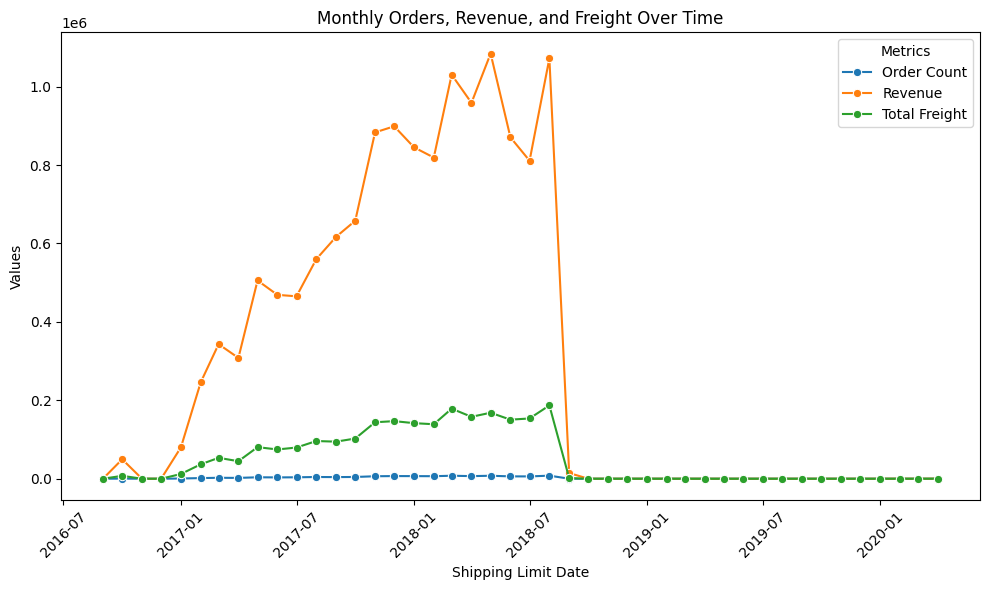

In [92]:
# Membuat grafik garis untuk order_count, revenue, dan total_freight
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_orderi_df, x='shipping_limit_date', y='order_count', label='Order Count', marker='o')
sns.lineplot(data=monthly_orderi_df, x='shipping_limit_date', y='revenue', label='Revenue', marker='o')
sns.lineplot(data=monthly_orderi_df, x='shipping_limit_date', y='total_freight', label='Total Freight', marker='o')

# Menambahkan judul dan label
plt.title('Monthly Orders, Revenue, and Freight Over Time')
plt.xlabel('Shipping Limit Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()

# Menampilkan grafik
plt.show()


In [96]:
import pandas as pd

# Pastikan orderd_df sudah diimpor sebelumnya
# Konversi kolom waktu ke format datetime jika belum
orderd_df['order_purchase_timestamp'] = pd.to_datetime(orderd_df['order_purchase_timestamp'])
orderd_df['order_approved_at'] = pd.to_datetime(orderd_df['order_approved_at'])
orderd_df['order_delivered_carrier_date'] = pd.to_datetime(orderd_df['order_delivered_carrier_date'])
orderd_df['order_delivered_customer_date'] = pd.to_datetime(orderd_df['order_delivered_customer_date'])
orderd_df['order_estimated_delivery_date'] = pd.to_datetime(orderd_df['order_estimated_delivery_date'])

# Resampling data per bulan
monthly_orders_df = orderd_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",  # Jumlah pesanan unik per bulan
    "order_approved_at": "mean",  # Rata-rata waktu approval per bulan
    "order_delivered_carrier_date": "mean",  # Rata-rata waktu pengiriman per carrier per bulan
    "order_delivered_customer_date": "mean",  # Rata-rata waktu pengiriman sampai customer per bulan
    "order_estimated_delivery_date": "mean"  # Rata-rata estimasi pengiriman per bulan
})

# Format indeks menjadi format Year-Month
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

# Reset indeks untuk membuat kolom menjadi lebih rapi
monthly_orders_df = monthly_orders_df.reset_index()

# Rename kolom untuk memberikan nama yang lebih jelas
monthly_orders_df.rename(columns={
    "index": "month",
    "order_id": "unique_order_count",  # Jumlah pesanan unik per bulan
    "order_approved_at": "avg_approval_time",  # Rata-rata waktu approval
    "order_delivered_carrier_date": "avg_carrier_delivery_time",  # Rata-rata pengiriman carrier
    "order_delivered_customer_date": "avg_customer_delivery_time",  # Rata-rata pengiriman sampai customer
    "order_estimated_delivery_date": "avg_estimated_delivery_time"  # Rata-rata estimasi pengiriman
}, inplace=True)

# Menampilkan hasil
print(monthly_orders_df)


<ipython-input-96-1bd0b2e53ed8>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = orderd_df.resample(rule='M', on='order_purchase_timestamp').agg({


   order_purchase_timestamp  unique_order_count             avg_approval_time  \
0                   2016-09                   4 2016-10-02 01:02:10.500000000   
1                   2016-10                 324 2016-10-18 01:01:01.660493824   
2                   2016-11                   0                           NaT   
3                   2016-12                   1 2016-12-23 23:31:37.000000000   
4                   2017-01                 800 2017-01-25 02:31:17.605000192   
5                   2017-02                1780 2017-02-17 05:46:11.708426752   
6                   2017-03                2682 2017-03-17 04:56:30.870991872   
7                   2017-04                2404 2017-04-17 18:27:48.642679040   
8                   2017-05                3700 2017-05-17 20:15:30.156486400   
9                   2017-06                3245 2017-06-16 05:26:28.558397440   
10                  2017-07                4026 2017-07-17 15:21:12.496771072   
11                  2017-08 

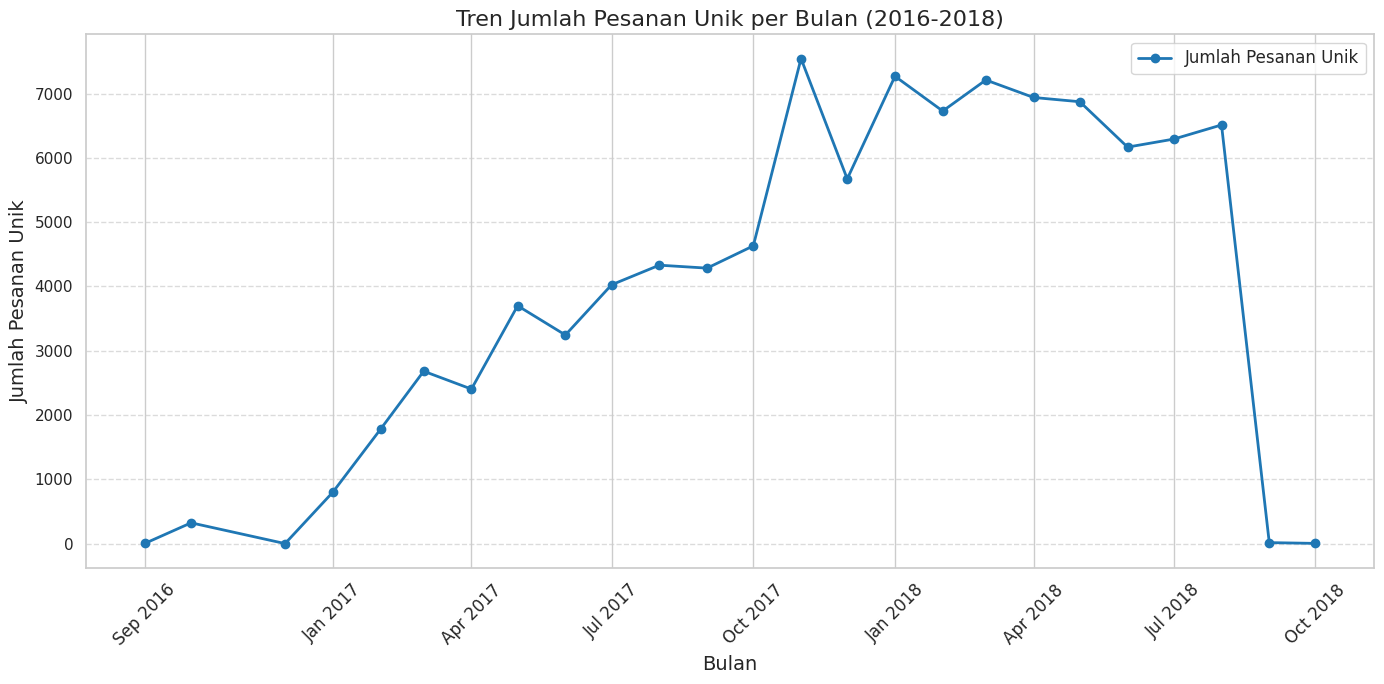

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Contoh DataFrame (silakan gunakan data Anda)
# orderd_df = pd.read_csv("path_to_your_data.csv")

# Mengonversi kolom 'order_purchase_timestamp' menjadi datetime
orderd_df['order_purchase_timestamp'] = pd.to_datetime(orderd_df['order_purchase_timestamp'], format='%Y-%m')

# Membatasi data ke rentang waktu 2016-2018
df_filtered = orderd_df[(orderd_df['order_purchase_timestamp'] >= '2016-01-01') &
                        (orderd_df['order_purchase_timestamp'] <= '2018-12-31')]

# Mengelompokkan data berdasarkan bulan
df_grouped = (
    df_filtered
    .groupby(df_filtered['order_purchase_timestamp'].dt.to_period('M'))
    .size()
    .reset_index(name='jumlah_pesanan')
)

# Konversi kembali period ke datetime untuk plot
df_grouped['order_purchase_timestamp'] = df_grouped['order_purchase_timestamp'].dt.to_timestamp()

# Set style Seaborn
sns.set_theme(style="whitegrid")

# Plot grafik
plt.figure(figsize=(14, 7))

# Plot jumlah pesanan unik per bulan
plt.plot(df_grouped['order_purchase_timestamp'],
         df_grouped['jumlah_pesanan'],
         marker='o', markersize=6, linestyle='-', linewidth=2, color='tab:blue',
         label="Jumlah Pesanan Unik")

# Menambahkan judul dan label
plt.title("Tren Jumlah Pesanan Unik per Bulan (2016-2018)", fontsize=16)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Jumlah Pesanan Unik", fontsize=14)

# Format sumbu-x: Tampilkan label setiap 3 bulan
plt.xticks(df_grouped['order_purchase_timestamp'][::3],
           labels=[d.strftime('%b %Y') for d in df_grouped['order_purchase_timestamp'][::3]],
           rotation=45, fontsize=12)

# Menambahkan grid yang lebih rapi
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legenda
plt.legend(fontsize=12)

# Layout rapi
plt.tight_layout()

# Tampilkan plot
plt.show()


##Dashboard

In [98]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [104]:
customers_df.to_csv("all_datacustomer.csv", index=False)
geolocation_df.to_csv("all_datageo.csv", index=False)
orderi_df.to_csv("all_dataorderi.csv", index=False)
orderp_df.to_csv("all_dataorderp.csv", index=False)
orderr_df.to_csv("all_dataorderr.csv", index=False)
orderd_df.to_csv("all_dataorderd.csv", index=False)
productc_df.to_csv("all_dataproductc.csv", index=False)
productsd_df.to_csv("all_dataproductd.csv", index=False)
sellersd_df.to_csv("all_dataseller.csv", index=False)


In [ ]:
import os
print("File disimpan di:", os.getcwd())


### Pertanyaan 1:

In [ ]:
Bagaimana tren order yang terjadi?

### Pertanyaan 2:

In [ ]:
Bagaimana distribusi jumlah kode pos unik per tahun?

**Insight:**
- dengan dibuatnya visualisasi tersebut, audiens dapat lebih mudah melihat dan memahami tren order dan distribusi kode pos untuk pertahunnya

## Analisis Lanjutan (Opsional)

## Conclusion

- Tren order mengalami kenaikan signifikan pada awal periode, diikuti oleh stabilisasi sementara, dan kemudian penurunan drastis hingga tidak ada aktivitas setelah pertengahan 2018.
- 2016: Aktivitas rendah, hampir tidak ada distribusi signifikan.
2017: Distribusi pesanan unik meningkat secara bertahap sepanjang tahun.
2018: Aktivitas memuncak pada awal tahun, stabil untuk sementara waktu, namun mengalami penurunan tajam mendekati nol di akhir tahun.